In [1]:
import math
from textblob import TextBlob as tb
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

/home/isusmelj/.pyenv/versions/3.6.3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/isusmelj/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
FILENAME_FINAL = "startup_data_description_enhanced.csv" # file with all features

In [3]:
df = pd.read_csv(FILENAME_FINAL, index_col=0)

In [4]:
# lower case strings
df.extension = df.extension.str.lower()

In [5]:
df.head(n=2)

acquired  age                                             awards  \
0         0  3.0  ['TOP 100 Swiss Startups 2013', 'TOP 100 Swiss...   
1         1  2.0  ['TOP 100 Swiss Startups 2014', 'TOP 100 Swiss...   

   awards_count cleanname  comp_year  \
0          10.0  Optotune     2011.0   
1          15.0    Dacuda     2011.0   

                                         description extension  incorporated  \
0  \na new technology based on electro active pol...        ag        2008.0   
1  \ndacuda is a swiss software company offering ...        ag        2009.0   

                                 name          ...            \
0                         Optotune AG          ...             
1  Dacuda AG (acquired by Magic Leap)          ...             

  cloud_in_description  drone_in_description smart_in_description  \
0                    0                     0                    0   
1                    0                     0                    0   

   management_in_description  estate_in_description  cameras_in_description  \
0                          0                      0                       1   
1                          0                      0                       0   

   renewable_in_description  navigation_in_description  signal_in_description  \
0                         0                          0                      0   
1                         0                          0                      0   

  systems_in_description  
0                      1  
1                      0  

[2 rows x 50 columns]

### Analyze the individual columns

#### The place where the startup is from

In [6]:
# we have to make sure we deal with different spellings of words (e.g. Zurich vs Zürich)
for index, row in df.iterrows():
    if 'Zürich' == row.place:
        df.set_value(index, "place", 'Zurich')

/home/isusmelj/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


### Origin from different places of all data

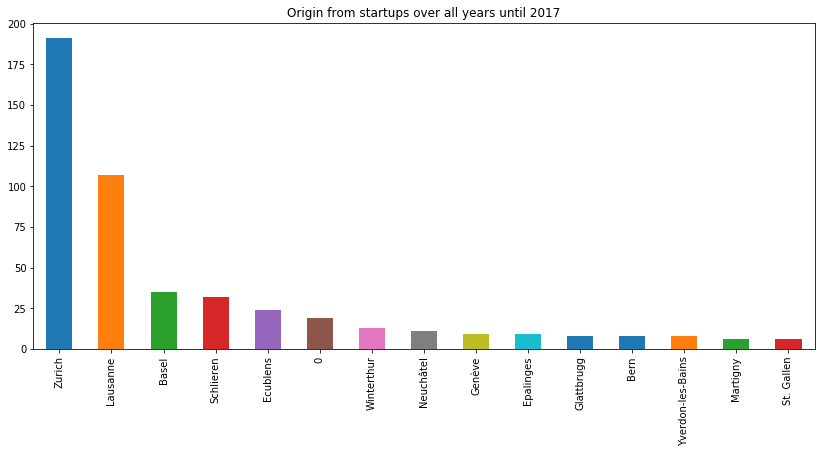

In [7]:
plt.figure(figsize=(14,6))
#tmp_df = df.loc[df['comp_year'].astype(int) in [2018]]
tmp_df = df.loc[df['comp_year'].astype(int) < 2018]
tmp_df.place.value_counts()[:15].plot(kind='bar')
plt.title('Origin from startups over all years until 2017')
plt.show()
plt.savefig('startup_origin_all_years_2011-2017.png')

### Origin from different places based on year

In [8]:
print([i for i in range(2011, 2019)])

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


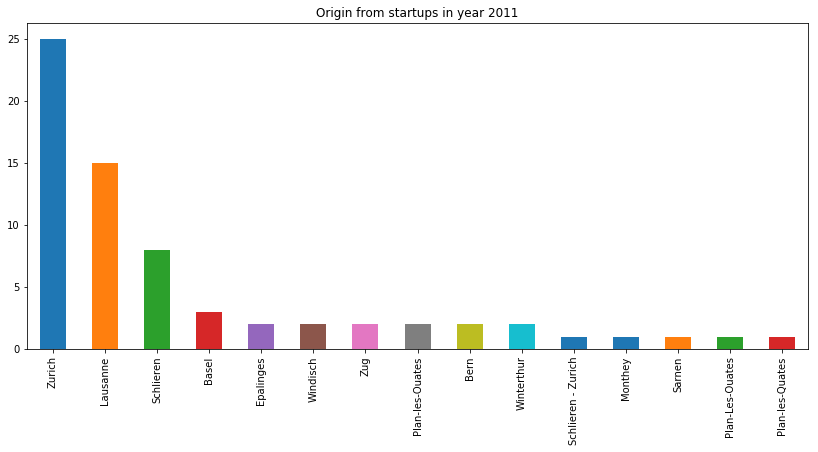

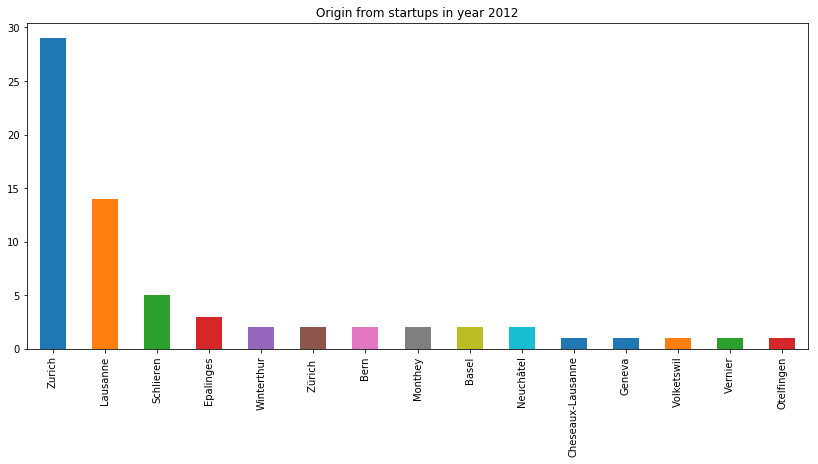

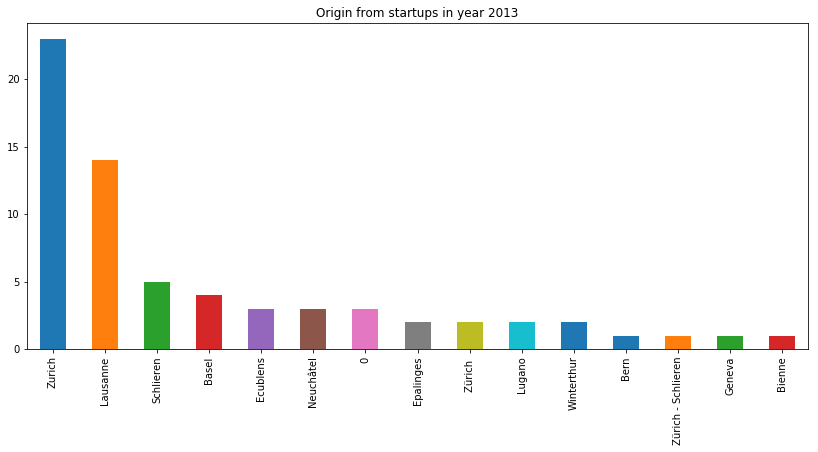

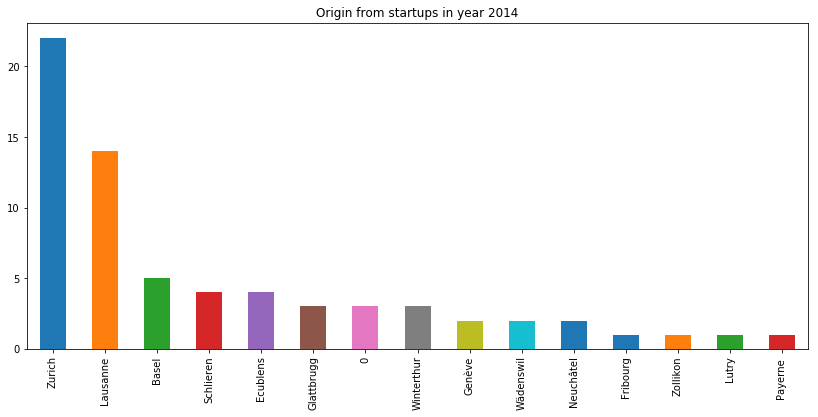

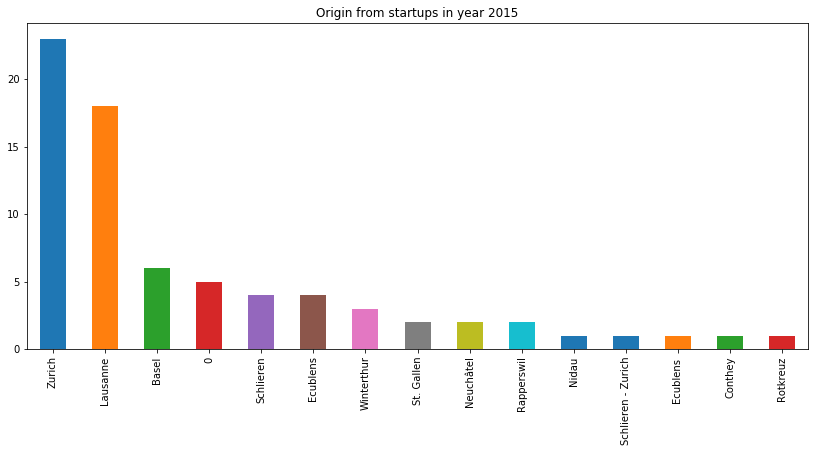

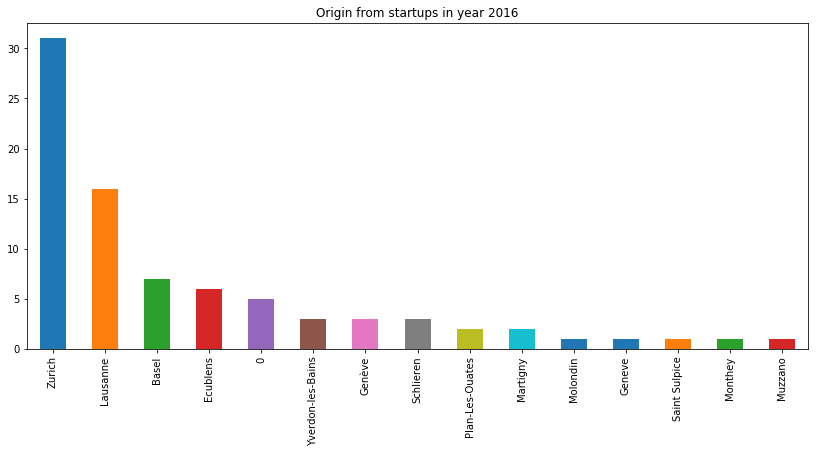

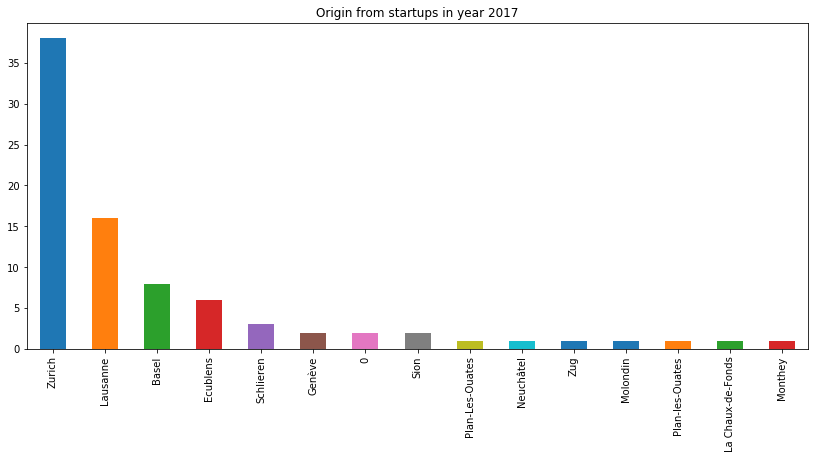

In [9]:
for i in range(2011, 2018):
    plt.figure(figsize=(14,6))
    tmp_df = df.loc[df['comp_year'].astype(int) == i]
    tmp_df.place.value_counts()[:15].plot(kind='bar')
    plt.title('Origin from startups in year {}'.format(i))
    plt.show()
    plt.savefig('startup_origin_year_{}.png'.format(i))

In [10]:
tmp_df = df.loc[df['comp_year'].astype(int) < 2018]
list_of_most_common_cities = list(tmp_df.place.value_counts()[:5].index)

### Encode top 5 cities into feature vectors

In [11]:
for word in list_of_most_common_cities:
    df["_".join(['from', word])] = 0
    for index, row in df.iterrows():
        if word in str(row.place):
            df.set_value(index, "_".join(['from', word]), 1)

/home/isusmelj/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [12]:
df.head(2)

acquired  age                                             awards  \
0         0  3.0  ['TOP 100 Swiss Startups 2013', 'TOP 100 Swiss...   
1         1  2.0  ['TOP 100 Swiss Startups 2014', 'TOP 100 Swiss...   

   awards_count cleanname  comp_year  \
0          10.0  Optotune     2011.0   
1          15.0    Dacuda     2011.0   

                                         description extension  incorporated  \
0  \na new technology based on electro active pol...        ag        2008.0   
1  \ndacuda is a swiss software company offering ...        ag        2009.0   

                                 name      ...      cameras_in_description  \
0                         Optotune AG      ...                           1   
1  Dacuda AG (acquired by Magic Leap)      ...                           0   

   renewable_in_description navigation_in_description  signal_in_description  \
0                         0                         0                      0   
1                         0                         0                      0   

   systems_in_description  from_Zurich  from_Lausanne  from_Basel  \
0                       1            0              0           0   
1                       0            1              0           0   

   from_Schlieren from_Ecublens  
0               0             0  
1               0             0  

[2 rows x 55 columns]

### Correlation matrix

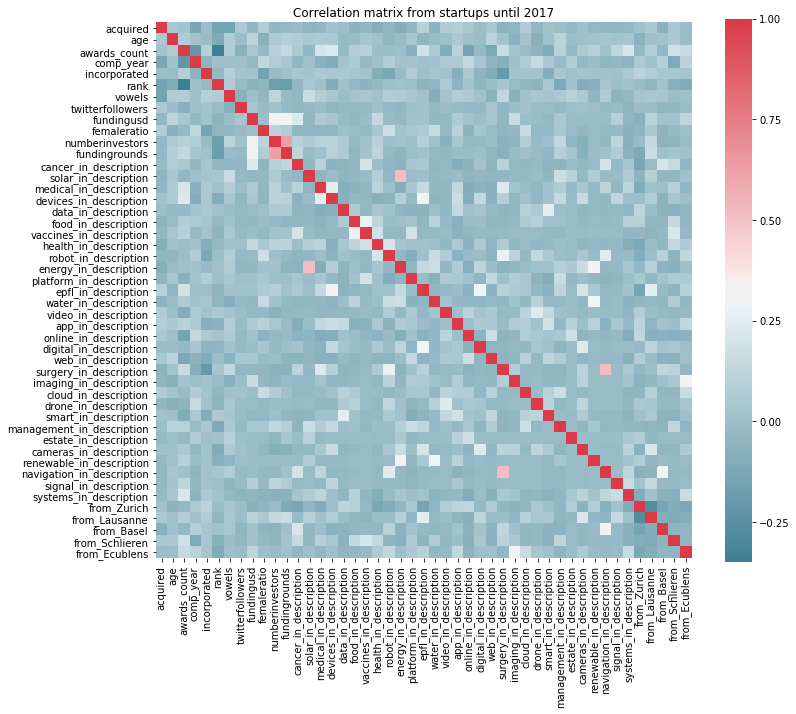

In [13]:
f, ax = plt.subplots(figsize=(12, 10))
tmp_df = df.loc[df['comp_year'].astype(int) < 2018]
corr = tmp_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation matrix from startups until 2017')
plt.show()
plt.savefig('startup_correlation_matrix_years_2011-2017.png')

### Correlation matrix per year

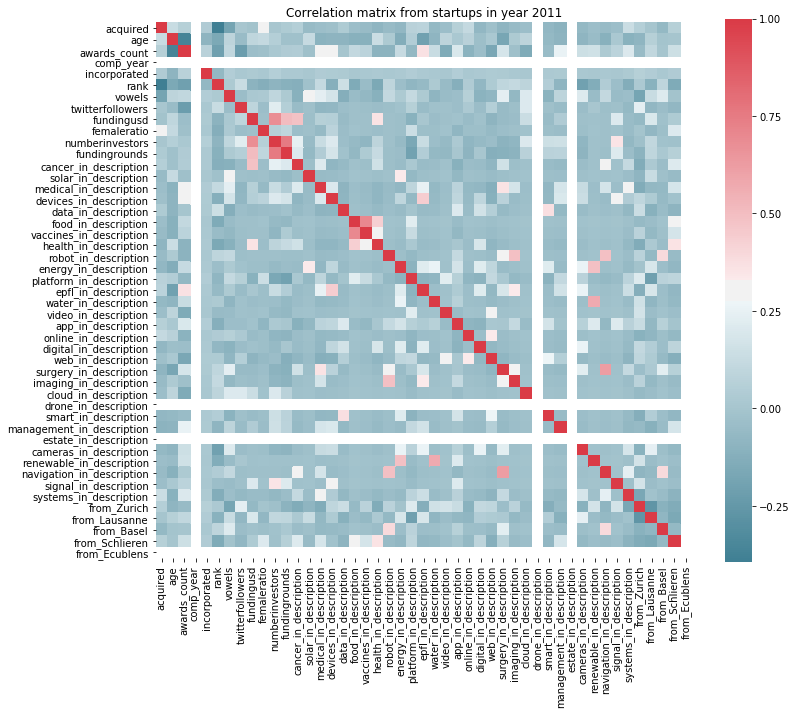

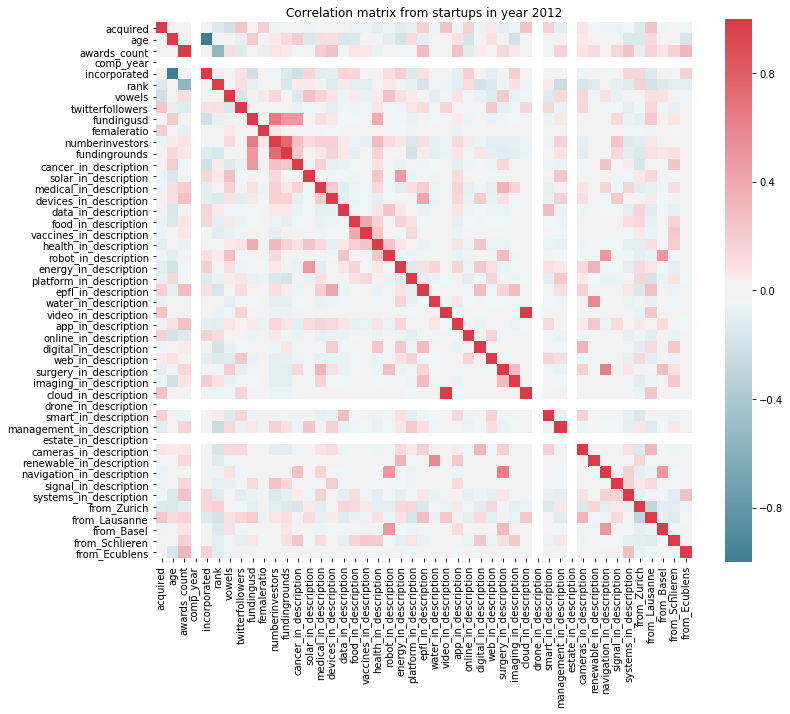

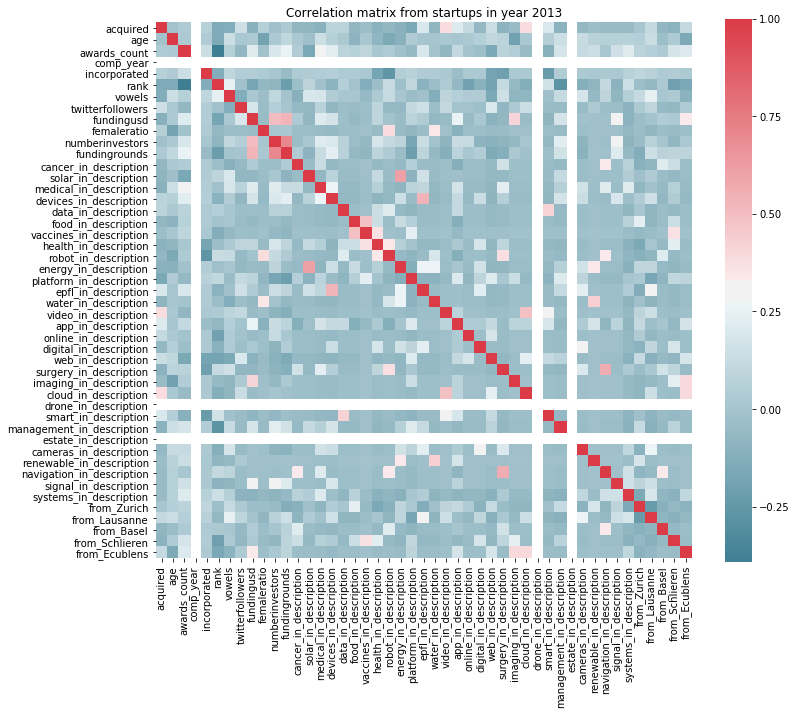

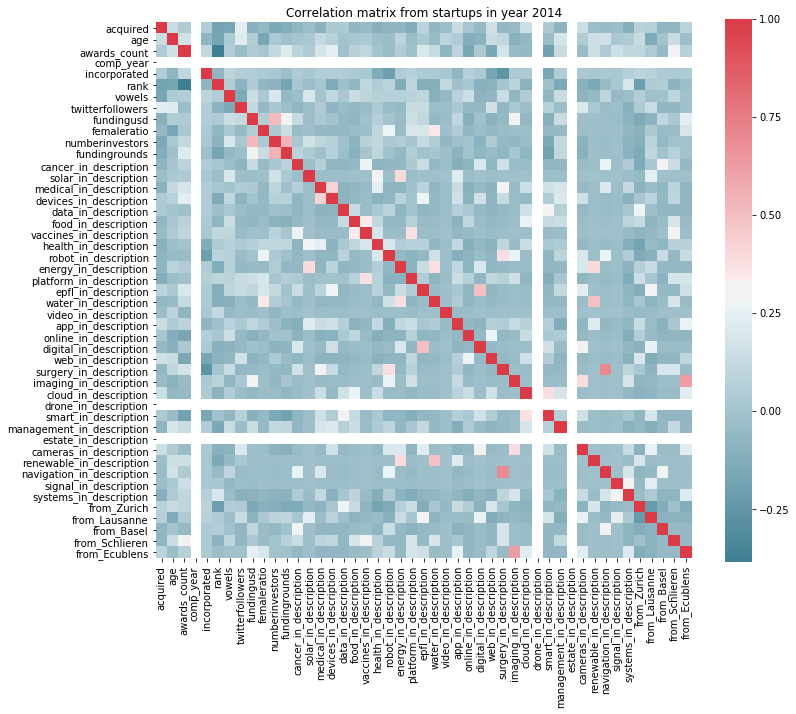

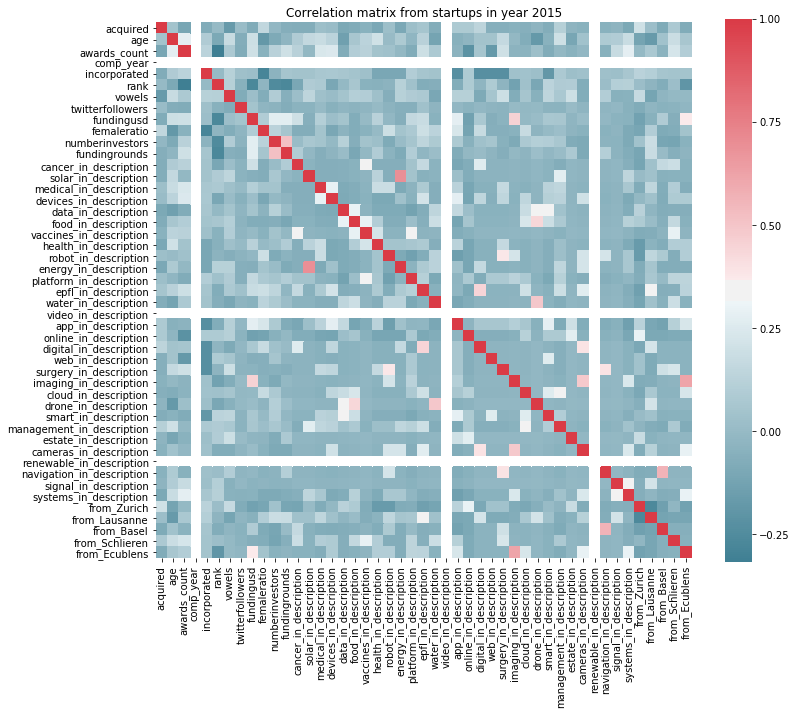

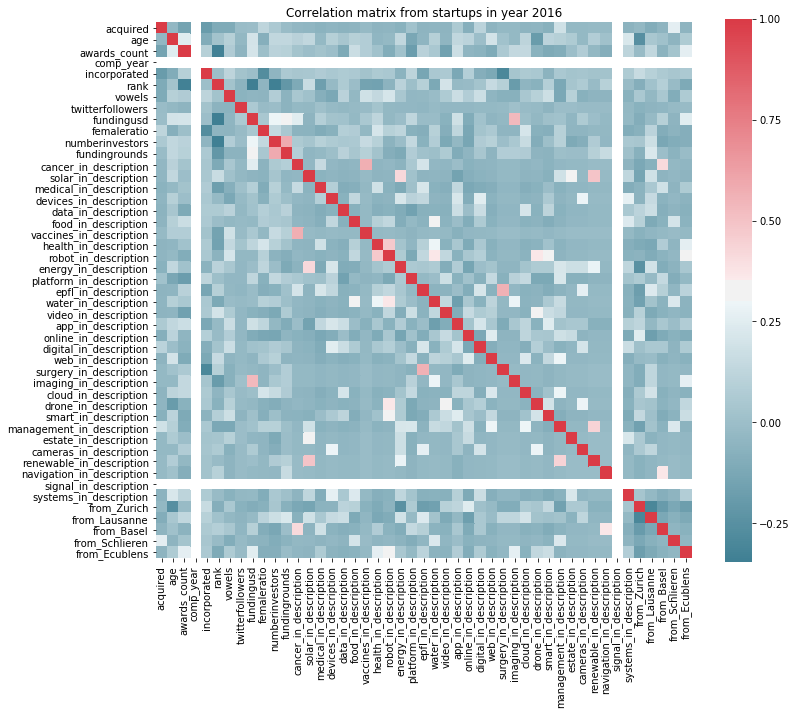

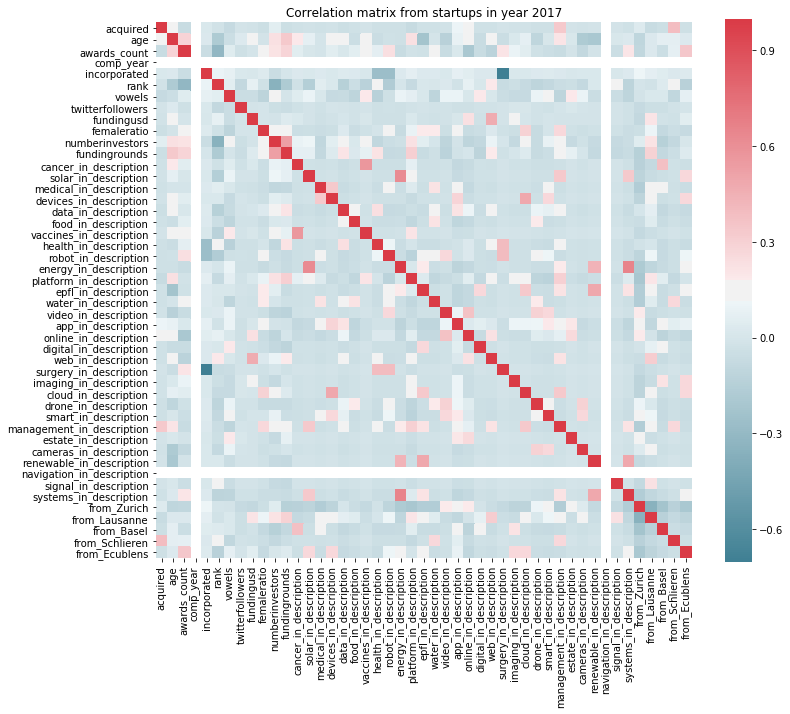

In [14]:
for i in range(2011, 2018):
    f, ax = plt.subplots(figsize=(12, 10))
    tmp_df = df.loc[df['comp_year'].astype(int) == i]
    corr = tmp_df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.title('Correlation matrix from startups in year {}'.format(i))
    plt.show()
    plt.savefig('startup_correlation_matrix_year_{}.png'.format(i))

### Remove NaNs

In [15]:
df = df.fillna(value=0)

### Categorize remaining features

In [16]:
df.extension.str.lower().unique()

array(['ag', 'sa', nan, 'sàrl', 'ltd.', 'gmbh', 's.a.', 'ltd', 'inc.',
       'sagl', 'llc', 'sarl', 'finance', 'getyourdesk.com', 'forecast',
       'laboratories', 'labs', 'technologies', 'innovation', 'bot',
       'accelerator', 'management', 'artanim', 'drones.', 'diagnostics',
       'snc', 'analytics', 'microscopy'], dtype=object)

In [17]:
list_of_extensions = list(df.extension.str.lower().unique())

In [18]:
for word in list_of_extensions:
    df["_".join(['has_extension', str(word)])] = 0
    for index, row in df.iterrows():
        if str(word) in str(row.place):
            df.set_value(index, "_".join(['has_extension', str(word)]), 1)

/home/isusmelj/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


### Save data to new csv file

In [19]:
df = df.drop(['awards', 'cleanname', 'description', 'extension', 'name', 'place', 'tags', 'incorporated'], axis=1)

In [20]:
df.to_csv("final_features.csv")

In [21]:
df.head(2)

acquired  age  awards_count  comp_year  rank  vowels  twitterfollowers  \
0         0  3.0          10.0     2011.0   1.0       1                79   
1         1  2.0          15.0     2011.0   2.0       0               727   

   fundingusd  femaleratio  numberinvestors            ...             \
0           0          0.0                0            ...              
1      542732          0.0                0            ...              

   has_extension_innovation has_extension_bot  has_extension_accelerator  \
0                         0                 0                          0   
1                         0                 0                          0   

   has_extension_management  has_extension_artanim  has_extension_drones.  \
0                         0                      0                      0   
1                         0                      0                      0   

   has_extension_diagnostics  has_extension_snc  has_extension_analytics  \
0                          0                  0                        0   
1                          0                  0                        0   

   has_extension_microscopy  
0                         0  
1                         0  

[2 rows x 75 columns]